In [15]:
import os
import cv2
import PIL
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
from tensorflow.keras.models import Sequential, load_model, model_from_json


Found 9137 images belonging to 4 classes.
1/1 [==============================] - 0s 114ms/step
Predicted Class: AppleScab
Confidence: 99.99
Top 3 Predictions:
AppleScab: 99.99%
AppleHealthy: 0.01%
Cedarapplerust: 0.0%


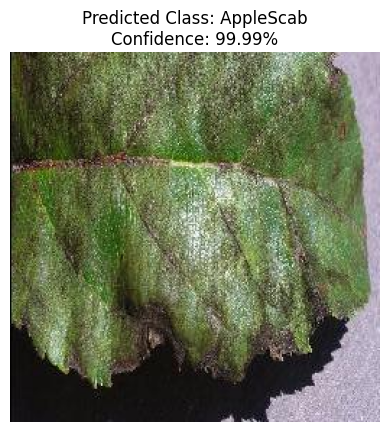

1/1 [==============================] - 0s 109ms/step
Features:
[[ 0.48664618  0.          0.          0.64804196  0.          0.
   0.          0.          0.          0.          7.4167686   0.
   0.          0.          0.          4.2723155   0.          0.
   0.          0.          0.          4.1513205   0.          2.5469396
   0.          0.          0.          0.          0.53858376  0.
   0.          0.24521899  0.          0.          0.          0.
   0.          0.          0.          9.968419    0.          0.
   0.          0.          0.          5.717409    8.600812    0.
   7.3386183   0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
  15.323438    0.          0.          0.        ]]


In [16]:


# Define a function to predict the disease and print the image with its class, reasons, and features
def predict_disease(model, train_set, IMG_SIZE, image_path):
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image

    # Make the prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Get the class labels from train_set
    class_labels = list(train_set.class_indices.keys())

    # Ensure the predicted class index is within the range of class_labels
    if predicted_class_index < len(class_labels):
        predicted_class = class_labels[predicted_class_index]
        confidence = round(100 * np.max(predictions[0]), 2)

        # Get the top 3 predicted classes and their corresponding probabilities
        top_3_indices = np.argsort(predictions[0])[::-1][:3]
        top_3_classes = [class_labels[i] for i in top_3_indices]
        top_3_probabilities = predictions[0][top_3_indices]

        # Print the prediction result
        print("Predicted Class:", predicted_class)
        print("Confidence:", confidence)
        print("Top 3 Predictions:")
        for i in range(3):
            print(f"{top_3_classes[i]}: {round(100 * top_3_probabilities[i], 2)}%")

        # Display the image
        plt.imshow(img)
        plt.axis('off')
        plt.title("Predicted Class: " + predicted_class + "\nConfidence: " + str(confidence) + "%")
        plt.show()

        # Get the features that contributed to the prediction
        intermediate_layer_model = keras.Model(inputs=model.input, outputs=model.layers[-2].output)
        features = intermediate_layer_model.predict(img_array)

        # Print the features
        print("Features:")
        print(features)

    else:
        print("Error: Invalid predicted class index.")

# Usage example
model_path = 'Apple_Disease_Detection.h5'
image_path = './valid/Cedarapplerust/CedarAppleRust(101).JPG'
train_dir = 'train'
IMG_SIZE = (256, 256)

model = load_model(model_path)
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
train_set = train_gen.flow_from_directory(
    train_dir,
    subset='training',
    class_mode='categorical',
    target_size=IMG_SIZE,
    batch_size=8
)
predict_disease(model, train_set, IMG_SIZE, image_path)